# Project: Neural Network
- Diabetes Classification
- Given a dataset of various metrics can we predict if a patient has diabetes

### Step 1: Import libraries

In [3]:
# predict if people have diabetes or not.

# project instruction:
# you should try this on your own step by step
# if you get stuck will help you. 
# if you get unstuck don't follow me along
# try it yourself again.
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/diabetes.csv**

In [8]:
data = pd.read_csv('files/diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class variable                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
# 1: diabetes
# 0: not diabetes
data['Class variable'].unique()

array([1, 0], dtype=int64)

### Step 3: Check for data quality
- Check **.isna().sum()**
- Check **.dtypes**

In [36]:
# data.info()에서 결측값과 dtype을 확인했으므로 skip

In [ ]:
# dtype을 확인하는 이유: numeric(float or int)처럼 보여도 string일 수도 있기 때문
# 일단은 numeric feature만 모델에 넣는다.

### Step 4: Create dataset
- Assign **X** to all but the last column
- Assign **y** to the last column

In [13]:
X = data.loc[:, :'Age'] # data.iloc[:,:-1]
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y = data.loc[:,'Class variable'] # data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

### Step 5: Create training and test set
- Use **train_test_split** to create **X_train, X_test, y_train, y_test**.

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)
# random_state를 42로 하는 이유를 google에 검색해볼 것.

### Step 6: Calculate average accuracy for 10 runs
- Create an empty list and assign it to **accuracies**
- Loop over **i** over 10 integers.
    - Set the random seed: **tf.random.set_seed(i)**
    - Create a **Sequential** model
    - Add a **Dense** layer with one exit node and **input_dim=8**, and **activation='sigmoid'**
    - Compile the model with **loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']**
    - Fit the model with **epochs=1500, batch_size=100, verbose=0**
    - Calculate the accuracy with **evaluate** on **X_test** and **y_test**
        - The second return variable is the accuracy
    - Append the accuracy (possibly multiplied by 100) to **accuraries**
- Calculate the average value

In [17]:
accuracies = []
for i in range(10):
    tf.random.set_seed(i)
    model = Sequential()
    # Dense의 units는 required argument이다.
    # 따라서 units는 반드시 지정해야 한다.
    model.add(Dense(1, input_dim=8, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=1500, batch_size=100, verbose=0)
    acc = model.evaluate(X_valid, y_valid) # _, accuracy = model.evaluate(X_valid, y_valid)
    accuracies.append(acc[1]*100) # accuracies.append(accuracy*100)

6/6 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7656


In [37]:
# average

sum = 0
for acc in accuracies:
    sum += acc
    
avg = sum / len(accuracies)
avg # 평균적으로 정확도가 75%이다.

# sum(accuracies / len(accuracies))

75.36458432674408

### Step 7: Predict values
- Predict all values with model on **X**
- Make it into class ids with **np.where(y_pred < 0.5, 0, 1)** *(assuming **y_pred** is the predictions)*

In [32]:
y_pred = model.predict(X)
# making perdictions as class ids
y_pred = np.where(y_pred < .5, 0, 1)
y_pred.T[0].shape

24/24 [==============================] - 0s 654us/step


(768,)

### Step 8 (Optional): Visualize correct vs incorrect predictions
- Calculate the ones that differ
    - **np.abs(y.to_numpy() - y_pred.T)** *(assuming the variables names are correct)*
    - Incorrect predictions will be 1, correct will be 0
- Make a scatter plot with the two variables and the correctness calculations as colors

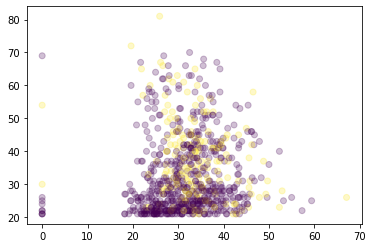

In [38]:
color = np.abs(y.to_numpy() - y_pred.T) # differ

fig, ax = plt.subplots()
# 'Body mass index'와 ''는 feature에서 임의로 택한 column이다.
ax.scatter(x=X['Body mass index'], y=X['Age'], c=color, alpha=.25)
# ax.scatter(x=y, y=y_pred.T[0], c=color)

# figure 해설:
# diabetes or not에 대한 figure가 아니다.
# correct하게 predict한 것과 incorrectly predict한 것을 분류한 것이다.
# Body mass index (BMI)가 낮으면서
# Age가 20 이상인 data에 대해서 model의 정확도가 높았다.
# bmi와 age가 높아질 수록 model의 정확도가 낮아진다.

In [ ]:
# visualization is a great way to
# get an idea of what's happening in the model.